##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [ ]:
#%pip install pandas 
#%pip install matplotlib
#%pip install sklearn
#%pip install numpy

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [8]:
#Load the data from csv file
filepath = "./data/catA_train.csv" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

# Data missing: Employee Data
We aim to fill in the missing employee data using linear regression.
We construct a helper function that returns cleansed data for the input dataframe

In [5]:
#Missing data treatment - Regression to fill in missing values for employees
def regress_fill_employee_data(data: pd.DataFrame) -> pd.DataFrame:
    #create a new cleansed data
    cleansed_data = data

    #linear regression to fill all empty cells in employees
    for employee_type in ["Employees (Domestic Ultimate Total)","Employees (Global Ultimate Total)","Employees (Single Site)"]:
        X_features = ["Sales (Domestic Ultimate Total USD)","Is Domestic Ultimate","Is Global Ultimate"]
        y_value = [employee_type]
        
        columns_to_check = [employee_type]
        train_data = data.dropna(subset=columns_to_check)
        predict_data = data[data[employee_type].isnull()]
        
        X = train_data[X_features]
        y = train_data[y_value]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        linear_regression_model = LinearRegression()
        linear_regression_model.fit(X_train,y_train)
        
        y_pred = linear_regression_model.predict(X_test)
    
        X_need = predict_data[X_features]
        y_need = predict_data[y_value]
        y_result = linear_regression_model.predict(X_need)
        y_need[employee_type] = y_result
        cleansed_data.loc[predict_data.index, y_value] = y_need

    return cleansed_data

In [33]:
data = pd.read_csv(filepath)
data = data[data['Sales (Domestic Ultimate Total USD)'] > 0]
data = data[data['Sales (Global Ultimate Total USD)'] > 0]
cleansed_data = regress_fill_employee_data(data)
cleansed_data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14388\3167631173.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_need[employee_type] = y_result
C:\Users\DELL\AppData\Local\Temp\ipykernel_14388\3167631173.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_need[employee_type] = y_result
C:\Users\DELL\AppData\Local\Temp\ipykernel_14388\3167631173.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,3567.459488,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.000000,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.000000,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.000000,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.000000,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0


# Exploratory Data Analysis
We aim to investigate the effect of entity type on the sales

In [ ]:
# Read the CSV file into a DataFrame
data = pd.read_csv(filepath)

# Display the first few rows of the DataFrame
print(data.head())

# Get the dimensions of the DataFrame
print(data.shape)

# Set the seed for reproducibility
np.random.seed(1101)

# Convert categorical variables to numeric codes
data['Entity.Type'] = np.where(data['Entity.Type'] == "Subsidiary", 1,
                               np.where(data['Entity.Type'] == "Parent", 2, 3))
print(data['Entity.Type'].value_counts())

data['Ownership.Type'] = np.where(data['Ownership.Type'] == "Private", 1,
                                  np.where(data['Ownership.Type'] == "Public", 2,
                                           np.where(data['Ownership.Type'] == "Public Sector", 3, 4)))
print(data['Ownership.Type'].value_counts())

# Select specific columns to keep for domestic and global data
keep_dom = ["SIC.Code", "Entity.Type", "Ownership.Type", "Employees..Domestic.Ultimate.Total.", "Sales..Domestic.Ultimate.Total.USD."]
keep_global = ["SIC.Code", "Entity.Type", "Ownership.Type", "Employees..Global.Ultimate.Total.", "Sales..Global.Ultimate.Total.USD."]

# Subset the data for domestic and global
data_dom = data[keep_dom]
print(data_dom.head())

# Find the maximum value of domestic sales
print(data_dom['Sales..Domestic.Ultimate.Total.USD.'].max())

# Recode domestic sales into a binary variable
data['Sales..Domestic.Ultimate.Total.USD.'] = np.where(data['Sales..Domestic.Ultimate.Total.USD.'] < 0.8 * 10**10, 1, 2)
print(data['Sales..Domestic.Ultimate.Total.USD.'].value_counts())

# Subset the data for global
data_global = data[keep_global]
print(data_global.head())

# Find the maximum value of global sales
print(data_global['Sales..Global.Ultimate.Total.USD.'].max())

# Recode global sales into a binary variable
data['Sales..Global.Ultimate.Total.USD.'] = np.where(data['Sales..Global.Ultimate.Total.USD.'] < 5.2 * 10**10, 1, 2)
print(data['Sales..Global.Ultimate.Total.USD.'].value_counts())

K = 10
wss = np.zeros(K)
for k in range(1, K+1):
    kmeans_model = KMeans(n_clusters=k).fit(data_dom[['SIC_Code', 'Entity_Type', 'Ownership_Type', 'Sales_Domestic_Ultimate_Total_USD']])
    wss[k-1] = sum(kmeans_model.inertia_)

plt.plot(range(1, K+1), wss, color='red', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares')
plt.show()

kout_domestic = KMeans(n_clusters=3).fit(data[['Sales_Domestic_Ultimate_Total_USD', 'Entity_Type']])
print(kout_domestic.labels_)
print(kout_domestic.cluster_centers_)
print(np.bincount(kout_domestic.labels_))

k = 30
print(data_dom.shape)
number = data_dom.shape[0]
test_indices = np.random.choice(range(number), 21000, replace=False)
train_dom_X = data_dom.drop(test_indices)
test_dom_X = data_dom.iloc[test_indices]
print(train_dom_X.shape)

train_dom_Y = data_dom['Sales_Domestic_Ultimate_Total_USD'].drop(test_indices)
test_dom_Y = data_dom['Sales_Domestic_Ultimate_Total_USD'].iloc[test_indices]

knn_pred = KNeighborsClassifier(n_neighbors=1).fit(train_dom_X, train_dom_Y).predict(test_dom_X)

acck = np.zeros(k)
for j in range(1, k+1):
    knn_model = KNeighborsClassifier(n_neighbors=j).fit(train_dom_X, train_dom_Y)
    knn_pred = knn_model.predict(test_dom_X)
    tablek = pd.crosstab(knn_pred, test_dom_Y)
    acck[j-1] = np.trace(tablek) / np.sum(tablek.values)

bestk = np.argmax(acck) + 1
print(bestk)

knn_pred = KNeighborsClassifier(n_neighbors=2).fit(train_dom_X, train_dom_Y).predict_proba(test_dom_X)
print(knn_pred)

tableknn = pd.crosstab(knn_pred, test_dom_Y)
print(tableknn)

accknn = np.trace(tableknn) / np.sum(tableknn.values)
print(accknn)

fnr_knn = tableknn.iloc[0, 1] / (tableknn.iloc[0, 1] + tableknn.iloc[1, 1])
print(fnr_knn)

# Exploratory Data Analysis Result
From the exploratory data analysis we performed, we decided to categorize the companies based on their entities

# Data conversion from strings to integers for "Entity"
We convert entity to integers for ease of dealing with data

In [34]:
#Convert entity to numbers
convert = []
for i in range(len(cleansed_data)):
    entity = data.iloc[i]['Entity Type']
    if entity == 'Subsidiary':
        l = 1
    elif entity == 'Parent':
        l = 2
    elif entity == 'Branch':
        l = 3
    elif entity == 'Independent':
        l = 4
    convert.append(l)
cleansed_data['entity type conversion'] = convert

# Decision Tree Regressor: Predict Sales based on Number of Employees in each Entity Category
## Testing the model with Global Sales vs Parent entity

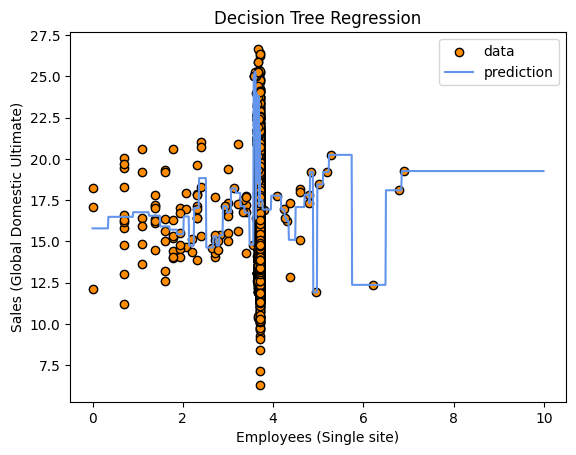

In [35]:
#(1) - TESTING WITH PARENTS + GLOBAL SALES
entity_type = ['Subsidiary','Parent', 'Branch', 'Independent' ]
Parent = cleansed_data[cleansed_data['Entity Type'] == 'Parent']

# Generate some example data
X = np.array(np.log(Parent['Employees (Single Site)'])).reshape(-1,1)
y = np.log(Parent['Sales (Global Ultimate Total USD)'])

# Create a decision tree regressor
regressor = DecisionTreeRegressor(max_depth=50)  # You can adjust the max_depth parameter

# Fit the model to the data
regressor.fit(X, y)

# Make predictions
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_test)

# Plot the results
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X, y, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction")
plt.xlabel("Employees (Single site)")
plt.ylabel("Sales (Global Domestic Ultimate)")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [36]:
# Sample data for demonstration
X = np.array(np.log(Parent['Employees (Single Site)'])).reshape(-1,1)
y = np.log(Parent['Sales (Global Ultimate Total USD)'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 50)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.2239209216634304
Mean Absolute Error: 0.284328748211436


## Remarks
- In our testing between Sales (Global) and Employee (Single Site), the Decision Tree Regression yields reliable prediction with small Mean Squared Error & Mean Absolute Error
- 
Now, we will loop through to find what kind of sales (Global or Domestic) as the y-variable and what kind of employees (Single Unit, Domestic, Global) would be perfomed with greater accuracy in Decision Tree Regression

In [37]:
#loop through all the groups first
for entity in entity_type:
    group = cleansed_data[cleansed_data['Entity Type'] == entity]
    
    #Loop through all the employees type for this group
    for employee_type in ['Employees (Single Site)','Employees (Domestic Ultimate Total)','Employees (Domestic Ultimate Total)']:
        for sale_type in ['Sales (Domestic Ultimate Total USD)','Sales (Global Ultimate Total USD)']:
            # Generate some example data
            X = np.array(np.log(group[employee_type])).reshape(-1,1)
            y = np.log(group[sale_type])

            # Create a decision tree regressor
            regressor = DecisionTreeRegressor(max_depth=50)  # You can adjust the max_depth parameter
            
            # Fit the model to the data
            regressor.fit(X, y)
            
            # Make predictions
            X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
            y_pred = regressor.predict(X_test)
            
            # Plot the results
            plt.figure()
            plt.scatter(X, y, edgecolor="black", c="darkorange", label="data")
            plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction")
            plt.xlabel(employee_type)
            plt.ylabel(sale_type)
            plt.title(f"Decision Tree Regression for {entity}: {employee_type} and {sale_type}")
            plt.legend()
            plt.show()

            # Sample data for demonstration
            X = np.array(np.log(group[employee_type])).reshape(-1,1)
            y = np.log(group[sale_type])
            
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Create a DecisionTreeRegressor
            regressor = DecisionTreeRegressor(max_depth = 50)
            
            # Fit the regressor to the training data
            regressor.fit(X_train, y_train)
            
            # Make predictions on the test set
            y_pred = regressor.predict(X_test)
            
            # Calculate the Mean Squared Error (MSE)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            print(f"Errors for {entity}: {employee_type} and {sale_type}")
            print("Mean Squared Error:", mse)
            print("Mean Absolute Error:", mae)

SyntaxError: unmatched ')' (206523822.py, line 53)

# Loop

In [39]:
mean_errors = {'Subsidiary':[],'Parent':[], 'Branch':[], 'Independent':[]}

for entity in entity_type:
    for max_depth in range(10,101,10):
        group = data[data['Entity Type'] == entity]
        
        # Generate some example data
        X = np.array(np.log(group['Employees (Domestic Ultimate Total)'])).reshape(-1,1)
        y = np.log(group['Sales (Domestic Ultimate Total USD)'])
        
        # Create a decision tree regressor
        regressor = DecisionTreeRegressor(max_depth=50)  # You can adjust the max_depth parameter
        
        # Fit the model to the data
        regressor.fit(X, y)
        
        # Make predictions
        X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
        y_pred = regressor.predict(X_test)

        # Sample data for demonstration
        X = np.array(np.log(group['Employees (Domestic Ultimate Total)'])).reshape(-1,1)
        y = np.log(group['Sales (Domestic Ultimate Total USD)'])
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Create a DecisionTreeRegressor
        regressor = DecisionTreeRegressor(max_depth = max_depth)
        
        # Fit the regressor to the training data
        regressor.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = regressor.predict(X_test)
        
        # Calculate the Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mean_errors[entity].append((mse+mae)/2)

param = {}
for key,list in mean_errors.items():
    min_index = list.index(min(list))
    param[key] = (min_index + 1)*10
    print(f"Best max depth for {key}: {(min_index + 1)*10}")

print(param)

Best max depth for Subsidiary: 20
Best max depth for Parent: 10
Best max depth for Branch: 10
Best max depth for Independent: 10
{'Subsidiary': 20, 'Parent': 10, 'Branch': 10, 'Independent': 10}


# Remarks
- We will thus choose max_depth based on our algorithm to find the optimal parameter that yeilds smallest error.
- After choosing the appropriate paramemters, we start constructing our final functions below

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [47]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''
    final = []

    #remove negative sales data
    hidden_data = hidden_data[hidden_data['Sales (Domestic Ultimate Total USD)'] > 0]
    hidden_data = hidden_data[hidden_data['Sales (Global Ultimate Total USD)'] > 0]

    #fill missing employees data
    cleansed_data = regress_fill_employee_data(hidden_data)

    #create new data frame based on each entity type
    Subsidiary = cleansed_data[cleansed_data['Entity Type']=="Subsidiary"]
    Parent = cleansed_data[cleansed_data['Entity Type']=="Subsidiary"]
    Branch = cleansed_data[cleansed_data['Entity Type']=="Subsidiary"]
    Independent = cleansed_data[cleansed_data['Entity Type']=="Subsidiary"]

    collection = {"Subsidiary":Subsidiary,"Parent":Parent,"Branch":Branch,"Independent":Independent}
    
    #Perform regression for each entity
    for entity in entity_type:
        group = data[data['Entity Type'] == entity]
        
        # Generate some example data
        X = np.array(np.log(group['Employees (Domestic Ultimate Total)'])).reshape(-1,1)
        y = np.log(group['Sales (Domestic Ultimate Total USD)'])
        
        # Create a decision tree regressor
        regressor = DecisionTreeRegressor(max_depth=50)  # You can adjust the max_depth parameter
        
        # Fit the model to the data
        regressor.fit(X, y)
        
        # Make predictions
        X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
        y_pred = regressor.predict(X_test)

        # Sample data for demonstration
        X = np.array(np.log(group['Employees (Domestic Ultimate Total)'])).reshape(-1,1)
        y = np.log(group['Sales (Domestic Ultimate Total USD)'])
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Create a DecisionTreeRegressor
        regressor = DecisionTreeRegressor(max_depth = param[entity]) #Retrieve the best max_depth
        
        # Fit the regressor to the training data
        regressor.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = regressor.predict(X_test)

        final.append(y_pred)

    result = [final]
    return result

##### Cell to check testing_hidden_data function

In [48]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
print(testing_hidden_data(test_df))

C:\Users\DELL\AppData\Local\Temp\ipykernel_14388\3167631173.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_need[employee_type] = y_result
C:\Users\DELL\AppData\Local\Temp\ipykernel_14388\3167631173.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_need[employee_type] = y_result
C:\Users\DELL\AppData\Local\Temp\ipykernel_14388\3167631173.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

[[array([19.31922634, 16.58638962, 14.81131348, ..., 16.18652006,
       13.84420909, 13.84420909]), array([13.77933057, 12.96741716, 15.15713532, ..., 14.2598354 ,
       13.5459153 , 13.77933057]), array([21.75552427, 16.38635023]), array([15.45963319, 15.45963319, 15.07485874, 19.63212999, 15.45963319,
       15.07485874, 15.23764114, 16.47888761, 13.29564424, 15.23764114,
       14.31450365, 18.49581674, 13.55561855, 15.18880507, 13.75101249,
       20.03495046, 15.45963319, 12.72398628, 12.72398628, 16.20669716,
       13.55561855, 12.72398628, 13.75101249, 15.23764114, 14.02466147,
       15.33732302, 13.55561855, 13.75101249, 13.75101249, 19.62718136,
       12.72398628, 13.29564424, 19.62718136, 13.75101249, 15.07485874,
       19.62718136, 15.23764114, 16.47888761, 18.49581674, 15.18880507,
       12.72398628, 13.55561855, 13.75101249, 15.23764114, 14.03024334,
       12.72398628, 13.54548074, 15.0601066 , 13.75101249, 18.49581674,
       13.75101249, 13.75101249, 15.07485874,

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!